# Physik der sozio-ökonomischen Systeme mit dem Computer
# (Physics of Socio-Economic Systems with the Computer)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Wintersemester 2022/23)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 10.11.2022


### Erster Vorlesungsteil:  
#### Klassifizierung evolutionärer symmetrischer ($2\times2$)-Spiele 


## Einführung

In diesem Unterkapitel werden die unterschiedlichen Spieltypen der gemischten Erweiterung eines simultanen (2 Spieler)-(2 Strategien) Spiels in strategischer Form mit symmetrischer Auszahlungmatrix klassifiziert. Die Einteilung lehnt sich an das Buch von  <i>Martin A. Nowak, Evolutionary Dynamics - Exploring the Equations of Life, 2006  (siehe Seite 49-51)</i> an, . Eine alternative Klassifizierung findet man z.B. auch in <i>Matthias Hanauske, Evolutionäre Quanten-Spieltheorie im Kontext sozio-ökonomischer Systeme, 2011</i>. Ausgangspunkt ist die neben stehende allgemeine symmetrische Auszahlunsmatrix eines (2 Personen)-(2 Strategien) Spiels (a, b, c und d sind reelwertige Zahlen). Da es sich um eine symmetrische Auszahlungmatrix handelt gilt: $\hat{\bf {\cal \$}}^B = \left( \hat{\bf {\cal \$}}^A \right)^{\!T}$. 

Abhängig von den gewählten Parametern der Auszahlunsmatrix lassen sich symmetrische ($2 \times 2$) Spiele in drei unterschiedliche Spielklassen gliedern: Dominante Spiele, Koordinationsspiele und Anti-Koordinationsspiele. Wir nehmen die folgende Form der Spielmatrix an:

$$
\begin{equation}
\hat{\bf {\cal \$}}^A = \hat{\bf {\cal \$}} =  
\left(
\begin{array}{rrr} 
\$_{11} & \$_{12} \\ 
\$_{21} & \$_{22} \\ 
\end{array}
\right)
=
\left(
\begin{array}{rrr} 
a & b \\ 
c & d \\ 
\end{array}
\right)
\end{equation}
$$

#### Die Klasse der dominanten Spiele ( a > c und b > d   bzw.   a < c und b < d )
Bei dieser Spielklasse dominiert eine Strategie die andere. Es existiert nur ein reines Nash-Gleichgewicht welches die dominante Strategie des Spiels darstellt. Dieser Fall tritt ein, falls:

a > c und b > d : Strategie 1 dominiert Strategie 2; dominante Strategie bei (x,y)=(1,1).

a < c und b < d : Strategie 2 dominiert Strategie 1; dominante Strategie bei (x,y)=(0,0).

#### Koordinationsspiele ( a > c und b < d )

Ein Koordinationsspiel existiert, falls die Parameter a, b, c und d der Auszahlungmatrix die folgenden Bedingungen erfüllen: a > c und b < d . Bei dieser Spielklasse existieren drei Nash-Gleichgewichte, ein gemischtes Nash-Gleichgewicht und zwei reine, symmetrische Nash-Gleichgewicht bei (x,y)=(0,0) und (x,y)=(1,1). 

#### Anti-Koordinationsspiele ( a < c und b > d )

Ein Anti-Koordinationsspiel existiert, falls die Parameter a, b, c und d der Auszahlungmatrix die folgenden Bedingungen erfüllen: a < c und b > d . Bei dieser Spielklasse existieren drei Nash-Gleichgewichte, ein gemischtes Nash-Gleichgewicht und zwei reine, unsymmetrische Nash-Gleichgewicht bei (x,y)=(0,1) und (x,y)=(0,1).  

Wir betrachten im folgenden die zeitliche Entwicklung des strategischen Verhaltens einer ganzen Population in einem wiederholten symmetrischen Spiel mit zwei Strategien. Wie im  Python Notebook EvolutionSpiel1 bereits dargestellt, wird der Populationsvektors $\vec{x}(t)$ (hier $x(t)$, da nur zwei Strategien) durch folgende Gleichung bestimmt
$$
\begin{equation}
\frac{d x(t)}{dt} = \left[ (\$_{11} -  \$_{21}) (x-x^2) + (\$_{12} - \$_{22}) (1-2x+x^2) \right] \, x(t) \, =:\,g(x) 
\end{equation}
$$
$x(t)$, der Anteil der Spieler die zum Zeitpunkt $t$ die Strategie $s_1$ spielen, h&auml;ngt neben der Funktion $g(x)$ von dem Anfangswert $x(t=0)$ ab. In gewisser Weise kann man $x(t)$ als die gemischte Strategie $\tilde{s}$ der gesamten Population ansehen.

In [22]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
from scipy import integrate

Definition der Funktion g(x) und der Differentialgleichung des evolutionären Spiels.

In [23]:
def g(x,a,b,c,d):
    g=((a-c)*(x-x*x) + (b-d)*(1-2*x+x*x))*x
    return g

In [24]:
def DGL(x,t):
    dxdt = g(x,a,b,c,d)
    return dxdt

### Beispiel eines dominanten Spiels ( a=10 > c=7 und b=6 > d=5 )
Wir betrachten die zeitliche Entwicklung eines dominanten Spiels. x(t), der Anteil der Spieler die zum Zeitpunkt t die Strategie 1 spielen, hängt neben der Funktion g(x) von dem Anfangswert $x_0:=x(t=0)$ ab. Setzt man z.B. $x_0=0.5$ (entspricht einer Anfangspopulation von 20% spielt Strategie 1 und 80% spielt Strategie 2) so kann man die Differentialgleichung wie folgt nummerisch lösen und grafisch darstellen: 

In [25]:
a,b,c,d = 10,6,7,5
tval = np.linspace(0, 4, 1001)
x0 = 0.2
Loes = integrate.odeint(DGL, x0, tval)

In [26]:
params = {
    'figure.figsize'    : [8,5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

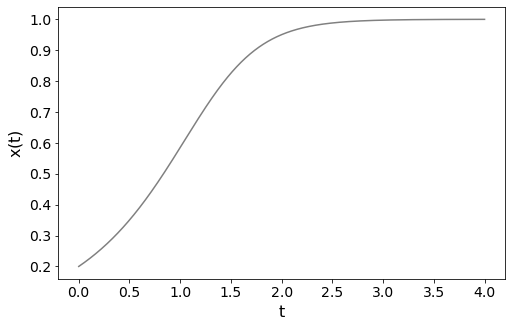

In [27]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm x(t)$")
plt.plot(tval, Loes,c="grey");

Berechnet man die Lösungen für mehrere Anfangswerte $x_0$, so erhält man die folgende Grafik:

In [28]:
numx0 = 30
x0=np.linspace(0.01,0.99,numx0)
cmap = plt.cm.Greys 
line_colors = cmap(np.linspace(0,1,numx0+10))

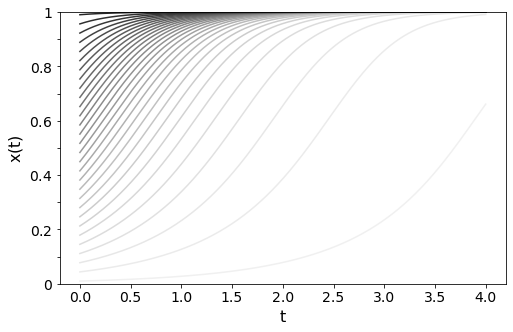

In [29]:
plt.cla()
# Achsenbeschriftungen usw.
plt.ylim(0,1)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],["$0$","","$0.2$","","$0.4$","","$0.6$","","$0.8$","","$1$"])
plt.ylabel(r"$\rm x(t)$")
plt.xlabel(r"$\rm t$")
j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    plt.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1

Unabhängig von der gewählten Anfangszusammensetzung der Population entwickelt sich die Entscheidungswahl der Population stehts zu einem Zustand indem jeder die Strategie 1 (x=1) spielt (Strategie 1 dominiert das Spiel, sie stellt das einzige Nash-Gleichgewicht des Spiels dar - die dominante Strategie). Die das zeitliche Verhalten bestimmende Funktion g(x) ist stehts positiv:

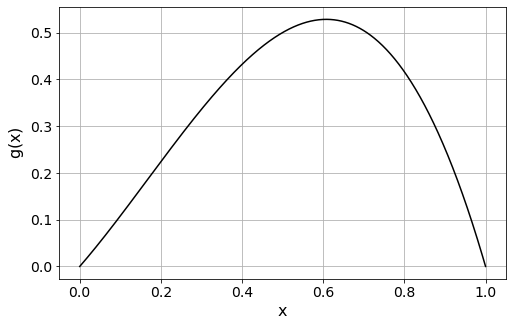

In [30]:
xval = np.linspace(0, 1, 1001)
plt.cla()
plt.ylabel(r"$\rm g(x)$")
plt.xlabel(r"$\rm x$")
plt.grid()
plt.plot(xval,g(xval,a,b,c,d),c="black", linewidth=1.5, linestyle='-');

### Beispiel eines Koordinationsspiels ( a=3> c=1 und b=4 < d=5 )
Wir betrachten die zeitliche Entwicklung eines Koordinantionsspiels.

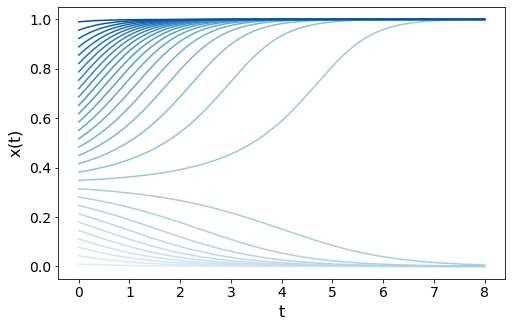

In [31]:
a,b,c,d = 3,4,1,5
tval = np.linspace(0, 8, 1001)
cmap = plt.cm.Blues 
line_colors = cmap(np.linspace(0,1,numx0+10))
plt.cla()
plt.ylabel(r"$\rm x(t)$")
plt.xlabel(r"$\rm t$")
j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    plt.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1

Abhängig von der gewählten Anfangszusammensetzung der Population entwickelt sich die Population in einem Koordinationsspiel zu einem Zustand in dem entweder alle Spieler die Strategie 2 (x=0) bzw. alle die Strategie 1 (x=1) wählen. Ist der Wert der gewählten Anfangszusammensetzung größer (bzw. kleiner) als ein bestimmter kritischer Wert so wird die Strategienwahl der Population im Laufe der Zeit zu x=1 (bzw. x=0) gezogen - man sagt es gibt zwei evolutionär stabile Strategien in Koordinationsspielen. Der kritische Anfangswertwert (hier speziell $x_0=x^\star=\frac{1}{3}$) entspricht dem gemischten Nash-Gleichgewicht des zugrundeliegenden Koordinationsspiels und ist außerdem die interne Nullstelle der Funktion g(x) (g(x)=0).

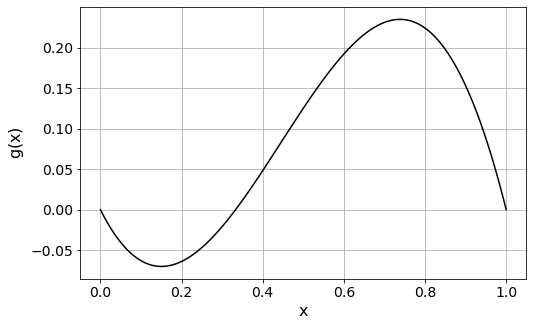

In [32]:
xval = np.linspace(0, 1, 1001)
plt.cla()
plt.ylabel(r"$\rm g(x)$")
plt.xlabel(r"$\rm x$")
plt.grid()
plt.plot(xval,g(xval,a,b,c,d),c="black", linewidth=1.5, linestyle='-');

Ermittlung des gemischten Nash-Gleichgewichts $x^\star=\frac{1}{3}$ durch Berechnung der internen Nullstelle der Funktion g(x):

In [33]:
import sympy as sym
sym.init_printing()
xGemNash = sym.symbols('x^\star')
GlGemNash=sym.Eq(g(xGemNash,a,b,c,d), 0)
GlGemNash

In [34]:
sym.solve(GlGemNash,xGemNash)[1]

### Beispiel eines Anti-Koordinantionsspiels ( a=-10 < c=1 und b=7 > d=2 )
Wir betrachten die zeitliche Entwicklung eines Anti-Koordinantionsspiels.

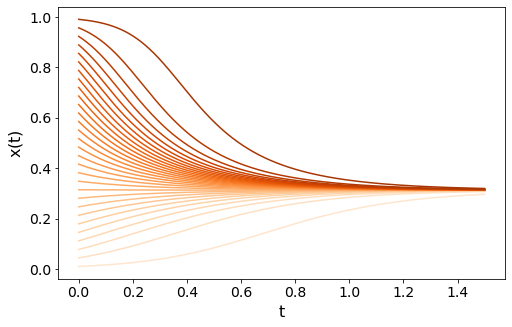

In [35]:
a,b,c,d = -10,7,1,2
tval = np.linspace(0, 1.5, 1001)
cmap = plt.cm.Oranges 
line_colors = cmap(np.linspace(0,1,numx0+10))
plt.cla()
plt.ylabel(r"$\rm x(t)$")
plt.xlabel(r"$\rm t$")
j = 0
while j < numx0:
    Loes = integrate.odeint(DGL, x0[j], tval)
    plt.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
    j = j + 1

Unabhängig von der gewählten Anfangszusammensetzung der Population entwickelt sich der Entscheidungswahl der Population zu einem Zustand der Koexistenz beider Strategien, wobei die für große Zeiten asymptotisch erreichte Populationszusammensetzung durch den Wert des internen gemischten Nash-Gleichgewichts $x^\star$ gegeben ist und die evolutionär stabile Strategie des Spiels darstellt. Wieder läßt sich der Wert des gemischten Nash-Gleichgewichts durch Berechnung der internen Nullstelle der Funktion g(x) ermitteln ($g(x^\star)=g(x=\frac{5}{16})=0$):

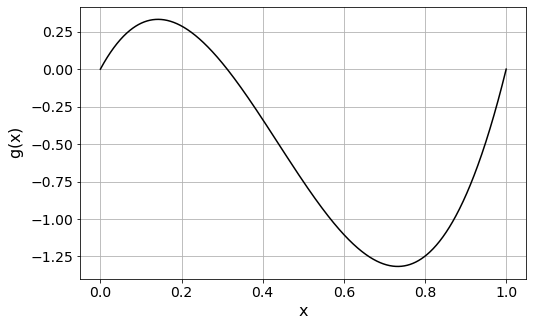

In [36]:
plt.cla()
plt.ylabel(r"$\rm g(x)$")
plt.xlabel(r"$\rm x$")
plt.grid()
plt.plot(xval,g(xval,a,b,c,d),c="black", linewidth=1.5, linestyle='-');

In [37]:
xGemNash = sym.symbols('x^\star')
GlGemNash=sym.Eq(g(xGemNash,a,b,c,d), 0)
GlGemNash

In [38]:
sym.solve(GlGemNash,xGemNash)[1]

### Beispiel: Das Falke-Taube Spiel (Anti-Koordinationsspiel)
Wir betrachten im folgenden ein ($2 \times 2$) Spiel mit symmetrischer Auszahlungsmatrix - das sogenannte ''Falke-Taube Spiel''. Wir nehmen an, dass unsere Population aus zwei Arten (zwei Gruppen) besteht: Die ''Falken'', die eine aggressive Spezies repräsentieren und die ''Tauben, die die friedlich aggierende Populationsart darstellen ($ \mu,i=\hbox{Falke,Taube}=F,T $). 

Wir sind daran interessiert, wie sich der Populationsvektor $x(t)$ mit der Zeit verhält, wobei wir mit $x(t)$ das relative Verhältnis von Falken in der Population definieren (($ y(t)=1-x(t) $) stellt somit das relative Verhältnis von Tauben dar). Wenn sich zwei Tauben treffen, so teilen sie friedlich die Ihnen zur Verfügung stehende Auszahlung, der wir im folgenden den Wert 1 zuordnen (somit $ \$_{22}=1/2 $). 

Treffen dagegen zwei aggressive Spezies der Population aufeinander, so kämpfen sie um die Auszahlung und ziehen sich unter Umständen Verletzungen zu, die in dem folgenden Auszahlungsansatz mittels des Parameters V berücksichtigt wurde ( $ \$_{11}=1/2-V/2 $ ).

Trifft schliesslich eine Taube auf einen Falken, so flieht die Taube (Auszahlung 0) und der Falke erhält die gesamte Auszahlung (Auszahlung 1).

Die folgende Matrix fasst die jeweiligen Auszahlungen nochmals zusammen:

$$
\begin{equation}
\hat{\bf {\cal \$}} =  
\left(
\begin{array}{rrr} 
\$_{11} & \$_{12} \\ 
\$_{21} & \$_{22} \\ 
\end{array}
\right)
=
\left(
\begin{array}{rrr} 
\frac{1-V}{2} & 1 \\ 
0 & \frac{1}{2} \\ 
\end{array}
\right)
\end{equation}
$$

Wir beschränken uns im folgenden auf den Fall $V > 1$ und man kann leicht mittels der Bestantwort-Pfeile zeigen, dass das Spiel unter diesen Einschränkungen der Klasse der Anti-Koordinationsspiele angehört (für den Fall $V \leq 1$ gehört das Spiel jedoch der Klasse der dominanten Spiel an). Das Falke-Taube Spiel besitzt ein gemischtes Nash-Gleichgewicht bei der Strategienkombination $(x^\star,y^\star)=(\tilde{s}^{A\star},\tilde{s}^{B\star})=(\frac{1}{V},\frac{1}{V})$ und zwei reine, unsymmetrische Nash-Gleichgewicht bei (x,y)=(0,1) und (x,y)=(1,0). Die zeitliche Entwicklung des Populationsvektors $x(t)$ wird durch die folgende Differentialgleichung bestimmt:

$$
\begin{equation}
\frac{d x}{dt} = \frac{V}{2} x^3 - \frac{V+1}{2} x^2 + \frac{1}{2} x \, =:\,g(x) 
\end{equation}
$$

Die auf im folgenden dargestellte Animation zeigt die Funktion g(x) bei Variation des Parameters V im Bereich [1,5]. Die interne Nullstelle der Funktion g(x) entspricht dem gemischten Nash-Gleichgewicht des Spiels ($\frac{d g(x)}{dx}=0 \rightarrow \{0,1/V,1\}$). 

In [39]:
V = sym.symbols('V')
a,b,c,d = (1-V)/2,1,0,1/2
GlGemNash=sym.Eq(g(xGemNash,a,b,c,d), 0)
GlGemNash

In [40]:
sym.solve(GlGemNash,xGemNash)

In [41]:
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()
ax = fig.gca()

def animate(i):
    ax.cla()
    ax.plot(xval,g(xval,a.subs(V,1+4*i/30),b,c,d),c="black", linewidth=1.5, linestyle='-')
    ax.set_ylabel(r"$\rm g(x)$")
    ax.set_xlabel(r"$\rm x$")
    ax.grid()
    ax.set_ylim(-0.26, 0.08)
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=30,interval=150)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Die zeitliche Entwicklung des Populationsvektors x(t), d.h. der Anteil der Spieler die zum Zeitpunkt t die Strategie "Falke" spielen, hängt neben der Funktion g(x) von dem Anfangswert x(t=0) ab. Setzt man z.B. x(t=0)=0.05, soentspricht dies einer Anfangspopulation von 5% Falken und 95% Tauben. Die durch das gemischte Nash-Gleichgewicht (bzw. die interne Nullstelle der Funktion g(x)) festgelegte gemischte Strategie der Population ($x^\star=\frac{1}{V}$) stellt die evolutionär stabile Strategie des Falke-Taube Spiels dar. Unabhängig von der gewählten Anfangszusammensetzung der Population entwickelt sich die Population zu einem Zustand der Koexistenz beider Strategien, wobei die für große Zeiten asymptotisch erreichte Populationszusammensetzung durch den Wert des internen gemischten Nash-Gleichgewichts gegeben ist und die evolutionär stabile Strategie darstellt. Variiert man den Parameter V (hier V=[1,5]), so verschiebt man diese evolutionär stabile Strategie - dies wird in der folgenden Animation dargestellt.

In [42]:
tval = np.linspace(0, 15, 1001)
fig = plt.figure()
ax = fig.gca()

def animate(i):
    ax.cla()
    setV=a.subs(V,1+4*i/30)
    def DGLsetV(x,t):
        dxdt = g(x,np.float64(setV),b,c,d)
        return dxdt
    j = 0
    while j < numx0:
        Loes = integrate.odeint(DGLsetV, x0[j], tval)
        ax.plot(tval,Loes,c=line_colors[j+5], linewidth=1.5, linestyle='-');
        j = j + 1
    ax.set_ylabel(r"$\rm x(t)$")
    ax.set_xlabel(r"$\rm t$")
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=30,interval=150)

plt.close(ani._fig)

HTML(ani.to_html5_video())